# Real Estate Price Prediction
In this competition your task will be to predict the price of flats in test.csv. You will be given two datasets: train.csv (contains all features and prices of flats) and test.csv (only features).

### File descriptions:
* train.csv - the training set
* test.csv - the test set
* sampleSubmission.csv - a sample submission file in the correct format

### Data fields:
* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры

## 1. Загрузка библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2

import pickle

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100
pd.options.display.max_rows = 30

## 2. Загрузка и анализ данных

In [2]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [4]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [6]:
data[data == 0].count()

Id                  1
DistrictId         48
Rooms               8
Square              0
LifeSquare          0
KitchenSquare     697
Floor               0
HouseFloor        269
HouseYear           0
Ecology_1         537
Ecology_2           0
Ecology_3           0
Social_1          201
Social_2            0
Social_3         2997
Healthcare_1        1
Helthcare_2      4214
Shops_1          2316
Shops_2             0
Price               0
dtype: int64

#### Матрица корреляций:

In [7]:
data.corr()[np.abs(data.corr()) >= 0.2]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistrictId,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.246463,NaN,NaN,0.304335,0.306147,NaN,0.265100
Rooms,NaN,NaN,1.000000,0.662893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.550291
Square,NaN,NaN,0.662893,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.520075
LifeSquare,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KitchenSquare,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Floor,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.418986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseFloor,NaN,NaN,NaN,NaN,NaN,NaN,0.418986,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ecology_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Гистограммы распределений признаков:

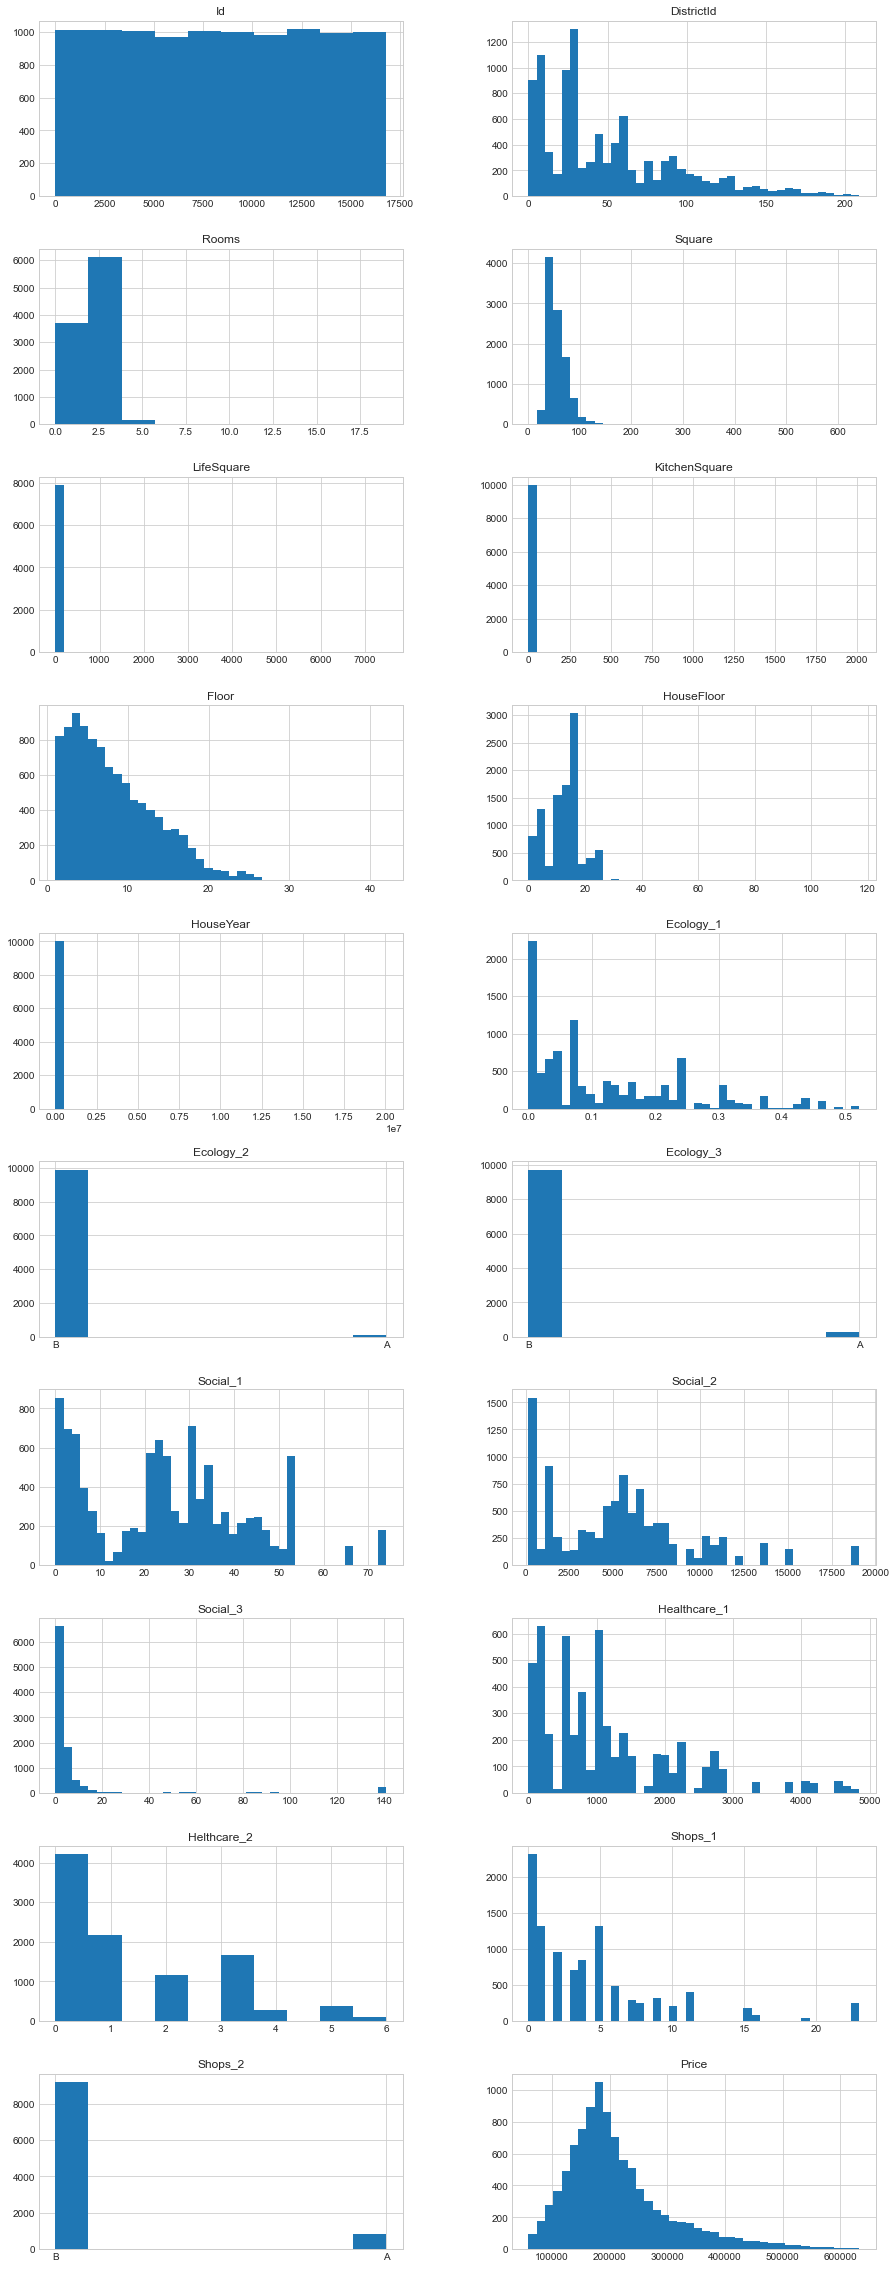

In [8]:
fig, ax = plt.subplots(10, 2)
ax = ax.flatten()

fig.set_size_inches(15, 41)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(20):
    if i in [0, 2, 10, 11, 16, 18]:
        ax[i].hist(data.iloc[:, i])
    else:
        ax[i].hist(data.iloc[:, i], bins=40)
    ax[i].set_title(data.columns[i])

## 3. Обработчик пропусков и выбросов

In [9]:
class DataPreparer:
    
    def __init__(self):
        self.distr_medians = None
    
    def fit(self, df):
        # Посчитаем медианы по каждому району(DistrictId) признаков с пропусками и выбросами
        self.distr_medians = pd.DataFrame(np.arange(df['DistrictId'].max() + 1), columns=['DistrictId'])
        df_cols = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Healthcare_1']
        
        for feature in df_cols:
            temp = df.groupby('DistrictId')[feature].median().interpolate()
            temp.name = feature + '_distr_median'
            
            self.distr_medians = pd.concat([self.distr_medians, temp], axis=1).interpolate()
    
    def transform(self, df):
        transformed_df = df.copy().reset_index(drop=True)
        temp_distr_med_df = df[['Id', 'DistrictId']].copy().reset_index(drop=True)
        temp_distr_med_df = pd.merge(temp_distr_med_df, self.distr_medians,
                                     on='DistrictId', how='left').interpolate()
        
        # Создадим маски на фичи с отсутствующими значениями и заменим их медианами районов
        transformed_df['LifeSquare_nan'] = transformed_df['LifeSquare'].isna().astype('int8')
        transformed_df['Healthcare_1_nan'] = transformed_df['Healthcare_1'].isna().astype('int8')
        
        transformed_df['Healthcare_1'] = transformed_df['Healthcare_1'].fillna(
            temp_distr_med_df['Healthcare_1_distr_median'])
        transformed_df['LifeSquare'] = transformed_df['LifeSquare'].fillna(
            transformed_df['Square'] * temp_distr_med_df['LifeSquare_distr_median'] / temp_distr_med_df['Square_distr_median'])
        
        # Преобразуем в бинарное представление фичи категориального типа
        for feature in ['Ecology_2', 'Ecology_3', 'Shops_2']:
            transformed_df[feature] = transformed_df[feature].replace({'A': 1, 'B': 0})
        
        # Разберемся с выбросами и нулевыми значениями основных признаков:
        # - Rooms, также создадим признак-маску на выбросы
        cond_rooms = (transformed_df['Rooms'] > 6) | (transformed_df['Rooms'] == 0)
        transformed_df['Rooms_outlier'] = cond_rooms.astype('int8')
        transformed_df.loc[cond_rooms, 'Rooms'] = \
            temp_distr_med_df.loc[cond_rooms, 'Rooms_distr_median']
        
        # - Square
        cond_square = (transformed_df['Square'] > 300) | \
                      (transformed_df['Square'] < 10)
        transformed_df.loc[cond_square, 'Square'] = \
            transformed_df.loc[cond_square, 'Rooms'] * \
            temp_distr_med_df.loc[cond_square, 'Square_distr_median'] / \
            temp_distr_med_df.loc[cond_square, 'Rooms_distr_median']
        
        # - LifeSquare
        cond_life_square = (transformed_df['LifeSquare'] > transformed_df['Square']) | \
                           (transformed_df['LifeSquare'] < 0.5 * transformed_df['Square'])
        transformed_df.loc[cond_life_square, 'LifeSquare'] = \
            transformed_df.loc[cond_life_square, 'Square'] * \
            temp_distr_med_df.loc[cond_life_square, 'LifeSquare_distr_median'] / \
            temp_distr_med_df.loc[cond_life_square, 'Square_distr_median']
        
        # - KitchenSquare
        cond_kitchen_square = (transformed_df['KitchenSquare'] > \
                                   (transformed_df['Square'] - transformed_df['LifeSquare'])) | \
                              (transformed_df['KitchenSquare'] <= 1)
        transformed_df.loc[cond_kitchen_square, 'KitchenSquare'] = \
            transformed_df.loc[cond_kitchen_square, 'Square'] - \
            transformed_df.loc[cond_kitchen_square, 'LifeSquare']
        
        # - Floor, HouseFloor с созданием признака-маски выбросов
        cond_floor = transformed_df['Floor'] > transformed_df['HouseFloor']
        transformed_df['HouseFloor_outlier'] = 0
        transformed_df.loc[cond_floor, 'HouseFloor_outlier'] = 1
        transformed_df.loc[cond_floor, 'Floor'], transformed_df.loc[cond_floor, 'HouseFloor'] = \
        transformed_df.loc[cond_floor, 'HouseFloor'], transformed_df.loc[cond_floor, 'Floor']
        
        cond_house_floor = (transformed_df['HouseFloor'] == 0) | \
                           (transformed_df['HouseFloor'] > 60)
        transformed_df.loc[cond_house_floor, 'HouseFloor_outlier'] = 1
        transformed_df.loc[cond_house_floor, 'HouseFloor'] = \
            temp_distr_med_df.loc[cond_house_floor, 'HouseFloor_distr_median']
        
        # - HouseYear с созданием признака-маски выбросов
        cond_house_year = transformed_df['HouseYear'] > datetime.now().year
        transformed_df['HouseYear_outlier'] = cond_house_year.astype('int8')
        transformed_df.loc[cond_house_year, 'HouseYear'] = \
            temp_distr_med_df.loc[cond_house_year, 'HouseYear_distr_median']
        
        return transformed_df

## 4. Генератор новых признаков
* **DistrictRoomsMedPrice** - категориальный признак, который расчитан на основе целевой переменной Price, сгрупированной по DistrictId и Rooms.
* **ESHSMedPrice** - категориальный признак, также рассчитанный на основе целевой переменной Price, но сгруппированной по категориям признаков Ecology, Social, Healthcare, Shops, которые в свою очередь конвертированы из одноименных количественных признаков. 

In [10]:
class FeatureGenerator:
    
    def __init__(self):
        self.eshs = ['Ecology_1', 'Social_1', 'Healthcare_1', 'Shops_1']
        self.eshs_bins = {}
        self.distr_size = None
        self.distr_rooms_med_price = None
        self.eshs_med_price = None
    
    def eshs_to_cat(self, df):
        for feature in self.eshs:
            df[feature[:-2] + 'Category'] = pd.cut(df[feature], 
                                                   bins=self.eshs_bins[feature], 
                                                   labels=False).astype('int').fillna(6)
        return df
    
    def fit(self, df):
        temp = df.copy()
        
        self.distr_size = temp['DistrictId'].value_counts().reset_index() \
                            .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
        
        self.distr_rooms_med_price = temp.groupby(['DistrictId', 'Rooms'], as_index=False)['Price'].median() \
                            .rename(columns={'Price': 'DistrictRoomsMedPrice'})
        
        for feature in self.eshs:
            self.eshs_bins[feature] = np.linspace(-0.001, temp[feature].max(), 6)
        temp = self.eshs_to_cat(temp)
        
        self.eshs_med_price = temp.groupby(['EcologyCategory', 'SocialCategory', 'HealthcareCategory', 'ShopsCategory'], 
                                           as_index=False)['Price'].median().rename(columns={'Price': 'ESHSMedPrice'})
    
    def transform(self, df):
        transformed_df = df.copy()
        
        transformed_df = transformed_df.merge(self.distr_size, on='DistrictId', how='left')
        transformed_df['NewDistrict'] = 0
        transformed_df.loc[transformed_df['DistrictSize'].isna(), 'NewDistrict'] = 1
        transformed_df['DistrictSize'] = transformed_df['DistrictSize'].fillna(1).astype('int')
        
        transformed_df = self.eshs_to_cat(transformed_df)
        
        transformed_df = transformed_df.merge(self.distr_rooms_med_price, on=['DistrictId', 'Rooms'], how='left')
        transformed_df['DistrictRoomsMedPrice'] = transformed_df['DistrictRoomsMedPrice'].interpolate()
        
        transformed_df = transformed_df.merge(self.eshs_med_price, 
                                              on=['EcologyCategory', 'SocialCategory', 'HealthcareCategory', 'ShopsCategory'], 
                                              how='left')
        transformed_df['ESHSMedPrice'] = transformed_df['ESHSMedPrice'].interpolate()
        
        return transformed_df

Функции для оптимизации данных для хранения:

In [11]:
def float_to_int(df):
    for feature in ['Rooms', 'Floor', 'HouseFloor', 'HouseYear', 
                    'Social_1', 'Social_2', 'Social_3', 
                    'Healthcare_1', 'Helthcare_2', 'Shops_1']:
        df[feature] = df[feature].astype(np.int64)
    
    return df


def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [12]:
data_train, data_valid = train_test_split(data, test_size=0.3, random_state=23, 
                                          stratify=data[['Ecology_2', 'Ecology_3', 'Shops_2']])

In [13]:
dp_model = DataPreparer()
dp_model.fit(data_train)
prepared_data_train = dp_model.transform(data_train)
prepared_data_valid = dp_model.transform(data_valid)
prepared_data_test = dp_model.transform(data_test)

fg_model = FeatureGenerator()
fg_model.fit(prepared_data_train)
prepared_data_train = fg_model.transform(prepared_data_train)
prepared_data_valid = fg_model.transform(prepared_data_valid)
prepared_data_test = fg_model.transform(prepared_data_test)

prepared_data_train = reduce_mem_usage(float_to_int(prepared_data_train))
prepared_data_valid = reduce_mem_usage(float_to_int(prepared_data_valid))
prepared_data_test = reduce_mem_usage(float_to_int(prepared_data_test))

Memory usage of dataframe is 1.50 MB
Memory usage after optimization is: 0.46 MB
Decreased by 69.2%
Memory usage of dataframe is 0.64 MB
Memory usage after optimization is: 0.20 MB
Decreased by 69.2%
Memory usage of dataframe is 1.03 MB
Memory usage after optimization is: 0.31 MB
Decreased by 69.9%


In [14]:
prepared_data_train.to_csv('prepared_data_train.csv', index=False, encoding='utf-8')
prepared_data_valid.to_csv('prepared_data_valid.csv', index=False, encoding='utf-8')
prepared_data_test.to_csv('prepared_X_test.csv', index=False, encoding='utf-8')

In [15]:
prepared_data_train.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,Rooms_outlier,HouseFloor_outlier,HouseYear_outlier,DistrictSize,NewDistrict,EcologyCategory,SocialCategory,HealthcareCategory,ShopsCategory,DistrictRoomsMedPrice,ESHSMedPrice
0,4432,84,3,54.304752,33.369961,8.000000,4,5,1953,0.149666,0,0,22,4789,2,4087,4,1,0,230408.703125,0,0,0,1,0,58,0,1,1,4,0,233177.796875,188604.718750
1,3872,23,1,37.478981,31.119339,6.359643,3,4,2017,0.005767,0,0,1,388,0,1576,0,0,0,70234.015625,1,1,0,1,0,372,0,0,0,1,0,103835.359375,139897.078125
2,9131,23,1,38.934578,32.327942,6.606636,17,17,1977,0.075779,0,0,6,1437,3,1576,0,2,0,107528.203125,1,1,0,0,0,372,0,0,0,1,0,103835.359375,139897.078125
3,13657,56,3,77.525673,46.888287,10.000000,12,17,1987,0.000000,0,0,23,5067,4,2620,2,6,0,510424.281250,0,1,0,0,0,22,0,0,1,2,1,414835.125000,333128.406250
4,16102,17,1,38.595783,19.418503,10.000000,12,14,1966,0.000000,0,0,18,3374,5,620,1,2,0,202533.968750,0,0,0,1,0,36,0,0,1,0,0,202533.968750,224610.687500
5,13640,61,1,38.592274,19.714418,6.000000,5,9,1980,0.300323,0,0,52,10311,6,80,1,9,0,172546.859375,0,1,0,0,0,89,0,2,3,0,1,181918.218750,224774.515625
6,15348,149,3,74.571762,46.826363,10.000000,6,10,2002,0.041116,0,0,53,14892,4,2597,1,4,0,254652.765625,0,1,0,0,0,6,0,0,3,2,0,249062.703125,191618.171875
7,7465,58,1,44.949551,28.586159,16.363392,3,4,1977,0.437885,0,0,23,5735,3,1084,0,5,0,108599.398438,0,0,0,1,0,122,0,4,1,1,1,121387.710938,165879.328125
8,827,27,1,39.209835,20.949718,9.000000,8,16,1975,0.072158,0,0,2,629,1,1927,0,0,1,228352.812500,0,1,0,0,0,613,0,0,0,1,0,117801.203125,139897.078125
9,2391,39,1,36.976177,23.799398,9.000000,6,14,1980,0.428826,0,0,25,5011,8,730,0,2,0,148170.546875,0,0,0,0,0,39,0,4,1,0,0,156375.015625,164717.906250


In [16]:
prepared_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     7000 non-null   int16  
 1   DistrictId             7000 non-null   int16  
 2   Rooms                  7000 non-null   int8   
 3   Square                 7000 non-null   float32
 4   LifeSquare             7000 non-null   float32
 5   KitchenSquare          7000 non-null   float32
 6   Floor                  7000 non-null   int8   
 7   HouseFloor             7000 non-null   int8   
 8   HouseYear              7000 non-null   int16  
 9   Ecology_1              7000 non-null   float32
 10  Ecology_2              7000 non-null   int8   
 11  Ecology_3              7000 non-null   int8   
 12  Social_1               7000 non-null   int8   
 13  Social_2               7000 non-null   int16  
 14  Social_3               7000 non-null   int16  
 15  Heal

In [17]:
prepared_data_train[prepared_data_train == 0].count()

Id                          1
DistrictId                 35
Rooms                       0
Square                      0
LifeSquare                  0
                         ... 
SocialCategory           2154
HealthcareCategory       3010
ShopsCategory            4255
DistrictRoomsMedPrice       0
ESHSMedPrice                0
Length: 33, dtype: int64

In [18]:
prepared_data_train.corr()[np.abs(prepared_data_train.corr()) >= 0.2]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,Rooms_outlier,HouseFloor_outlier,HouseYear_outlier,DistrictSize,NewDistrict,EcologyCategory,SocialCategory,HealthcareCategory,ShopsCategory,DistrictRoomsMedPrice,ESHSMedPrice
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistrictId,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.243177,NaN,NaN,0.274706,0.308039,NaN,NaN,0.271112,-0.278424,NaN,NaN,NaN,NaN,-0.513611,NaN,NaN,0.226388,0.280743,NaN,0.324854,0.404418
Rooms,NaN,NaN,1.000000,0.761296,0.655894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.571247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.687710,NaN
Square,NaN,NaN,0.761296,1.000000,0.890602,0.471036,NaN,NaN,0.201618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.531336,NaN
LifeSquare,NaN,NaN,0.655894,0.890602,1.000000,0.278609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.419205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.376353,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SocialCategory,NaN,0.226388,NaN,NaN,NaN,-0.208109,NaN,NaN,NaN,NaN,NaN,NaN,0.974975,0.923141,NaN,NaN,0.499553,0.501241,NaN,0.258707,-0.390446,NaN,NaN,NaN,NaN,-0.604707,NaN,NaN,1.000000,NaN,0.444033,0.295436,0.469857
HealthcareCategory,NaN,0.280743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.947669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
ShopsCategory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.448086,0.494293,0.644307,NaN,0.457078,0.957940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.322074,NaN,NaN,0.444033,NaN,1.000000,NaN,0.289096
DistrictRoomsMedPrice,NaN,0.324854,0.687710,0.531336,0.376353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.294013,0.258770,NaN,NaN,0.311329,NaN,NaN,0.799002,-0.237957,NaN,NaN,NaN,NaN,-0.443491,NaN,NaN,0.295436,NaN,NaN,1.000000,0.557324


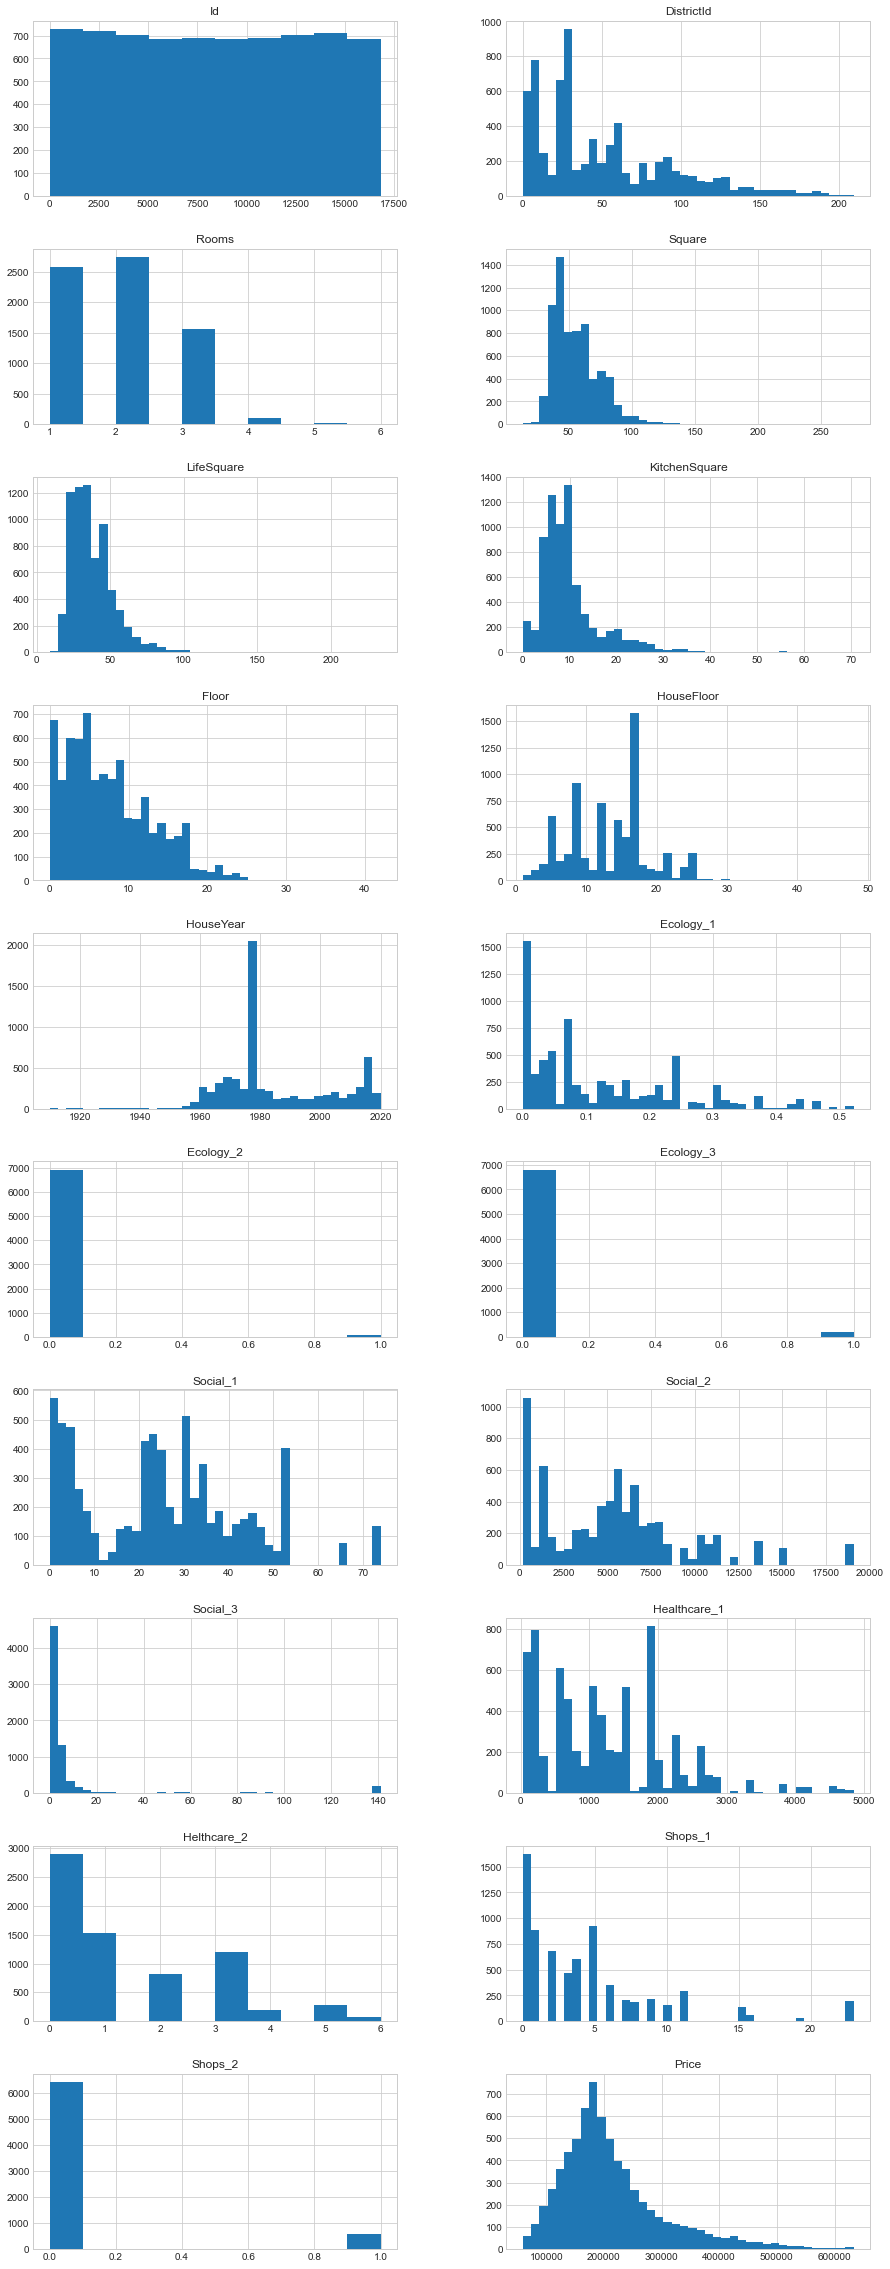

In [19]:
fig, ax = plt.subplots(10, 2)
ax = ax.flatten()

fig.set_size_inches(15, 41)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for i in range(20):
    if i in [0, 2, 10, 11, 16, 18]:
        ax[i].hist(prepared_data_train.iloc[:, i])
    else:
        ax[i].hist(prepared_data_train.iloc[:, i], bins=40)
    ax[i].set_title(prepared_data_train.columns[i])

## 5. Построение модели

In [20]:
x_train = prepared_data_train.drop(columns='Price')
y_train = prepared_data_train['Price']

x_valid = prepared_data_valid.drop(columns='Price')
y_valid = prepared_data_valid['Price']

x_test = prepared_data_test

In [21]:
# all_features = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 
#             'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 
#             'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2', 
#             'LifeSquare_nan', 'Healthcare_1_nan', 'Rooms_outlier', 'HouseFloor_outlier', 
#             'HouseYear_outlier', 'DistrictSize', 'NewDistrict', 'EcologyCategory', 'SocialCategory', 
#             'HealthcareCategory', 'ShopsCategory', 'DistrictRoomsMedPrice', 'ESHSMedPrice']

Путем анализа важности признаков в рассматриваемой модели (feature_importances_) и перебора их разных комбинаций найден оптимальный набор признаков:

In [22]:
learn_features = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'HouseFloor', 'HouseYear', 
                  'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'DistrictSize', 'ESHSMedPrice']
target = 'Price'
x_train = x_train.reindex(columns=learn_features)
x_valid = x_valid.reindex(columns=learn_features)
x_test = x_test.reindex(columns=learn_features)

#### Функция для подсчета метрики r2:

In [23]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Поиском по сетке с кросс-валидацией (GridSearchCV) найдены лучшие параметры модели GradientBoostingRegressor:

In [24]:
with open('grid_search_gb.pkl', 'rb') as f:
    gs = pickle.load(f)

In [25]:
gs.best_score_

0.7542964363897244

In [26]:
gs.best_params_

{'max_depth': 6, 'min_samples_leaf': 6, 'n_estimators': 150}

Train R2:	0.905
Test R2:	0.724


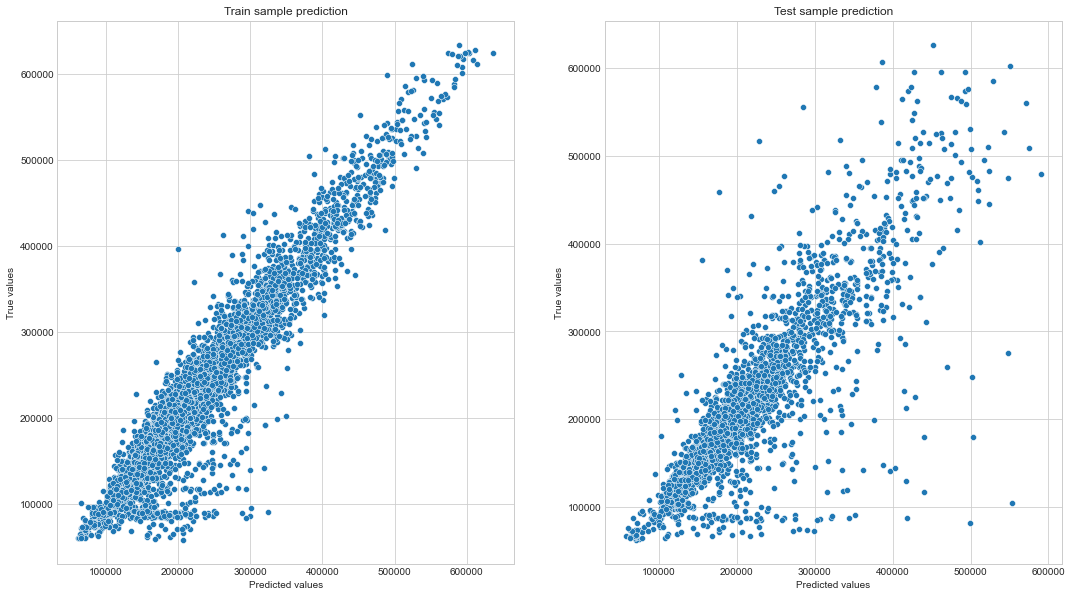

In [27]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=6,
                                     min_samples_leaf=6,
                                     random_state=23,  
                                     n_estimators=150)
gb_model.fit(x_train, y_train)

y_train_pred = gb_model.predict(x_train)
y_valid_pred = gb_model.predict(x_valid)
evaluate_preds(y_train, y_train_pred, y_valid, y_valid_pred)

## 6. Предсказание на тесте и выгрузка результатов

In [28]:
submit = pd.read_csv('sample_submission.csv')
submit['Price'] = gb_model.predict(x_test)
submit.to_csv('gb_submit.csv', index=False)